<h1><center>Detecting Changepoints During COVID-19 Using KATS</center></h1>
<center><b>Authors:</b> Dhruv Arora, Priyanka Bijlani, Sharmeelee Bijlani, Divya Pandey, Lakshmi Venkatasubramanian</center> <br>
<center><b>Project Sponsor:</b> Sourav Chatterjee</center>

## Table of Contents

1. [Introduction](#introduction) <br>
2. [Background](#background) <br>
3. [Problem Statement](#problem) <br>
4. [Part 1: Algorithm Exploration with TCPD Study](#part1) <br>
    a. [Evaluating CUSUMDetector](#part1a) <br>
    b. [Evaluating RobustStatDetector](#part1b) <br>
    c. [Evaluating BOCPDetector](#part1c) <br>
    d. [Algorithm Selection Criteria](#part1d) <br>
5. [Part 2: Applied Research on Google Mobility Data](#part2) <br>
    a. [Multiple Changepoints](#part2a) <br>
    b. [Seasonality](#part2b) <br>
    c. [Outliers](#part2c) <br>
    d. [Algorithm Selection for COVID-19 Story](#part2d) <br>
6. [Part 3: The Covid-19 Story](#part3) <br>
    a. [Covid-19 in the United States](#part3a) <br>
    b. [Covid-19 in King County, WA](#part3b) <br>
    c. [Covid-19 in New York vs Florida](#part3c) <br>
7. [Conclusion](#conclusion)


## Introduction <a name="introduction"></a>
Meta's Infrastructure Data Science team has released a time-series package called [KATS](https://facebookresearch.github.io/Kats/) to analyze time-series datasets. The KATS package implements multiple changepoint detection algorithms and tries to identify points in a time-series which show a sudden or abrupt change. A changepoint is defined as a ‘persistent change’ in the time series rather than an anomaly or an outlier in the time series data. The goal of this project is to conduct research on time series data and apply the KATS package to multiple datasets in various contexts to assess and evaluate the performance of the time-series algorithms. 

## Background <a name="background"></a>
Changepoint detection has a number of various applications. It is used, for example, in the fields of medicine, aerospace, finance, business, meteorology, and entertainment. Usually, change points are described in terms of changes between segments. To put it simply, a change point divides a time series into multiple segments where each segment has its own statistical characteristics (e.g., mean, variance, etc.). Thus, the change point is located where the underlying characteristics change abruptly. 

A common way to conduct changepoint detection is a sliding window through the signal. The main idea is to walk through the signal with a window of fixed size. For each step, a function computes a chance of having a changepoint in the current window. This function is usually called the cost function. Thus, for each point in the signal, we obtain a cost value indicating whether there is a change at that point or not. Usually, the costs are “low” as long as there is no change in the window and “high” if there is a change in the window. For example, if the costs exceed a predefined threshold, the point is marked as a changepoint, or the points with the highest costs can be marked as changepoints.


The theory of changepoint detection is well established in the literature; several methods have been implemented in standard packages. The question of how to choose the right one is crucial and depends on many factors. As there are many approaches and methods, we present three important factors to make a reasonable decision. First, you need to know your signal and which type of change you have. Second, the runtime plays an important role. Depending on the application, sensors may deliver hundreds of points in one second.  The window-based methods have a runtime of O(T), where T denotes the length of the signal. That is the reason why most of these types of algorithms can be used in online applications. Third, some applications require accurate results. There are other approaches that need a longer runtime but deliver more precise changepoints. Famous methods are, for example, the binary segmentation or bottom-up approaches, which take O(T log(T)) time, but they are still approximations. We will be reviewing the KATS package on multiple parameters mentioned above that would characterize the performance of the package.


## Problem Statement <a name="problem"></a>
As part of this project, we have evaluated the performance of the algorithms in the KATS package based on their ability to accurately detect changepoints. The data we will utilize for performance validation is datasets used in the [Turing Change Point Dataset Benchmark Study](https://github.com/alan-turing-institute/TCPD) and the [Google Mobility Dataset](https://www.google.com/covid19/mobility/) with true labels in the time-series as known by public knowledge. The goal is to derive true stories about the events during Covid-19 based on the retrospectively detected changepoints. This notebook assesses the strengths and shortcomings of the various algorithms implemented in the KATS package and also strives to provide recommendations to improve the algorithms from the applied research conducted as a part of this project.

This notebook contains the following sections:
1. Exploring changepoint detection algorithms using TCPD benchmark study
2. Applying changepoint algorithms to the Google Mobility data
3. Telling the Covid-19 story through changepoints

## Part 1: Algorithm Exploration with TCPD Study <a name="part1"></a>

There are two main challenges with changepoint detection problems. The first challenge is using the algorithms to identify changepoints in the dataset since the true label is unknown. This makes it hard to do model evaluation and cross-algorithm performance comparison. The second challenge is to identify the optimal number of changepoints by tuning hyperparameters. 
The Turing Changepoint Datasets benchmark was designed to overcome these exact challenges. The study provides a collection of over 30 datasets with annotated changepoints which can be taken as true changepoints and evaluated against detected changepoints to calculate metrics such as precision and recall for changepoint detection algorithms. The true changepoints were crowdsourced through the [AnnotateChange](https://github.com/alan-turing-institute/annotatechange) tool under the guidance to segment a time-series by points of abrupt change. For the purpose of our assessment, we have interpreted any repeated annotation for a dataset to be a true changepoint. 

The goal of this section is to create an algorithm selection criteria based on our findings where given certain characteristics in timeseries data, we recommend one or more algorithms. 

### Methodology
In this section, we evaluated each changepoint detection algorithm from the KATS package using the datasets from the Turing study. The code snippets below provide an analysis of an algorithm and its parameters optimized to find the changepoints closest to the true changepoints and with high confidence. The purpose of this excercise is to assess the advantages and shortcomings of each algorithm in the KATS package. These insights will be used to determine which algorithm is best suited for Google Mobility data for detecting changepoints during Covid. 

To run any of the code below, make sure to download the [Turing Study Github repository](https://github.com/alan-turing-institute/TCPD) to a chosen directory and save this notebook in the same directory. 

### Evaluating CUSUM Detector with Rail Lines data <a name="part1a"></a>

CUSUM is a method to detect an up/down shift of means in a time series. The algorithm is based on likelihood ratio cusum and is used to detect mean changes in Normal Distribution.The typical behavior of the log-likelihood ratio corresponding to a change in the mean of a Gaussian sequence with constant variance is negative drift before and positive drift after the change. So, the change lies in between the value of the log-likelihood ratio and its current minimum value.

In the code below, we are using the [Rail Lines Total Kilometers](https://github.com/alan-turing-institute/TCPD/tree/master/datasets/rail_lines) dataset from the Turing Study to demonstrate a deep dive into the CUSUMDetector algorithm. This data has 37 datapoints and tracks the total kilometers of rail lines in the world over the years of 1980 to 2016. 

#### Load rail lines data and plot true changepoints

Annotations : [10, 25, 10, 26, 10, 25, 25, 26, 25]


<Figure size 1600x480 with 0 Axes>

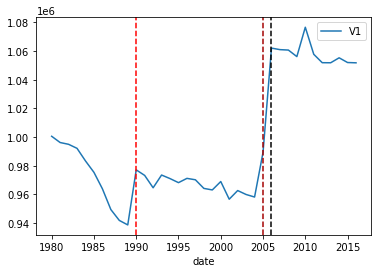

In [1]:
# import packages for data processing
import json
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from load_dataset import TimeSeries
import warnings
warnings.filterwarnings("ignore")

# import packages for kats cusum 
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData,TimeSeriesChangePoint

## Load annotated labels 
annotator_df = pd.read_json('TCPD-master/annotations.json')
rail_lines_df =  annotator_df[['rail_lines']]
list2d = np.array(rail_lines_df).flatten()
list2d = [l for l in list2d if (type(l)==list)]
rail_lines_annotation_lst = list(itertools.chain.from_iterable(list2d))
print("Annotations :", rail_lines_annotation_lst)

## Load rail_lines dataset
ts = TimeSeries.from_json('TCPD-master/datasets/rail_lines/rail_lines.json')
#print(ts)
rail_lines_df = ts.df
rail_lines_df['date'] =ts.datestr
rail_lines_df['is_CPD'] = np.where(rail_lines_df.t.isin(rail_lines_annotation_lst), 1,0)

# Plot the true annotated labels
#print(rail_lines_df.loc[rail_lines_df['is_CPD']==1])

figure(figsize=(20, 6), dpi=80);
rail_lines_df.plot('date', 'V1')

xposition = rail_lines_df.loc[rail_lines_df['is_CPD']==1][['t']].values

colormap = plt.cm.flag
colors = [colormap(i) for i in np.linspace(0, 1,len(xposition))]
for xc,color in zip(xposition,colors):
    plt.axvline(x=xc, color=color, linestyle='--');

#### Run CUSUM and plot detected changepoints

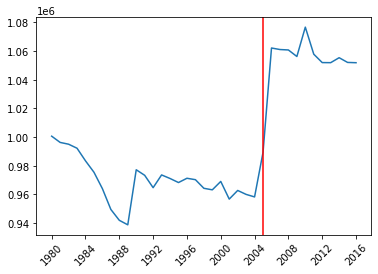

[(TimeSeriesChangePoint(start_time: 2005-01-01 00:00:00, end_time: 2005-01-01 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb36e679e20>), (TimeSeriesChangePoint(start_time: 1981-01-01 00:00:00, end_time: 1981-01-01 00:00:00, confidence: 0.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb36e6799d0>)]


In [2]:
# Create TimeSeriesData object to input in KATS algorithms
df = rail_lines_df
df['time']= df['date']
tsd = TimeSeriesData(df.loc[:,['time','V1']])
tsd[:5]

#CUSUMDetector only supports univariate time series. 
detector = CUSUMDetector(tsd)

#The CUSUMDetector detected only point 2005 in increase  direction 
change_points = detector.detector(return_all_changepoints=True)

plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

print(change_points)

To find the other changepoints, an interest window needs to be specified where a changepoint is expected. 

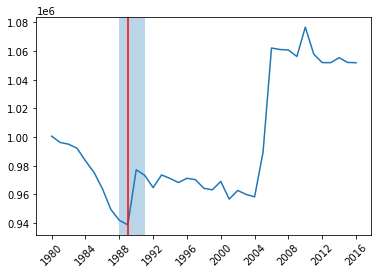

[(TimeSeriesChangePoint(start_time: 1989-01-01 00:00:00, end_time: 1989-01-01 00:00:00, confidence: 0.8736848775962036), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb36e6794f0>), (TimeSeriesChangePoint(start_time: 1990-01-01 00:00:00, end_time: 1990-01-01 00:00:00, confidence: 0.9014021947771731), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb36e6bcd30>)]


In [3]:
#CUSUMDetector only supports univariate time series. For multivariate time series, we need to use MultiCUSUMDetector
detector = CUSUMDetector(tsd)

#In the case below where there is only an increase, it will detect that increase.
change_points = detector.detector(interest_window=[8,12],return_all_changepoints=True,threshold=0.5,delta_std_ratio=0.5)

plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

print(change_points)

### Results
Refer to the Appendix notebook with deep dive on CUSUM hyperparameter tuning code and hiplots.

Cusum detects only 1 change point in any direction. In order to detect all the changepoints, we need to specify interest window parameter for all the other change points. If we know the range of points around which we expect a change point, we need to provide that range as the interest window. Based on hyper parameter tuning, the interest window has to be in the range of [changepoint-1, changepoint+(4 to 10 points)] for any changepoint. Though passing the interest window most of the times detect a change point in that range if there's one, it is not possible to know this range precisely upfront.

Threshold is the significance level or the probability of rejecting null hypothesis when it is true. While a high value of threshold of 0.7 and over detects the expected changepoints for a given interest window, the industry standard for significance level is 0.05. Also, with in KATS package, the default threshold value is 0.01. It is not a good practice to exceed the industry standard as we want to get significant change points with a very high confidence.

Hyperparameter tuning of other parameters such as start point, delta_std_ratio and min_abs_change wasn't very helpful.

If the data has seasonal component to it, then using an interest window in a time series with seasonality will give us a false positive. This can be mitigated by comparing the magnitude of the time series in the interest window to the magnitude of the the time series prior to the interest window. This is done by using parameters magnitude_quantile, magnitude_comparable_day, and magnitude_ratio. Based on the parameters we are using, we will keep a changepoint detected in interest_window only if at least half of the intervals prior to interest_window with the same length as interest_window have a maximum value not exceeding p / magnitude_ratio. Include this changepoint if and only if this proportion of days exceeds magnitude_comparable_day.

If the probability distributions before and after the change are known, then the CUSUM procedure is known to be optimal for an objective function that takes into account the magnitude of delays and the frequency of false alarms. Aside from optimality, the CUSUM is also simple to program and has an intuitive interpretation in terms of maximum likelihood. However, there are many situations where the relevant probability distributions can not be modeled precisely, and it would be difficult to use the CUSUM in these cases

### Evaluating BOCP Detector with Private Construction Spending Data <a name="part1b"></a>

Bayesian Online Change Point Detection (BOCPD) is a method for detecting sudden changes in a time series that persist over time. The BOCPD supports two types of models: Online model and Bayesian model.  The online model does not need to know the entire time series apriori. It only looks few steps ahead to make predictions. The Bayesian model is offline model and supports specifying prior beliefs in the model as with any other bayesian models. The online model has three `model` types, each of which are assessed in this analysis. 

* NORMAL_KNOWN_MODEL: Normal model with variance known. Use this to find level shifts in normally distributed data.
* TREND_CHANGE_MODEL : This model assumes each segment is generated from ordinary linear regression. Use this model to understand changes in slope, or trend in time series.
* POISSON_PROCESS_MODEL: This assumes a Poisson generative model. Use this for count data, where most of the values are close to zero.

This analysis of BOCPD uses the [Total Private Construction Spending](https://github.com/alan-turing-institute/TCPD/tree/master/datasets/construction) dataset from the Turing study starting with the Normal_Known_Model. 

#### List and plot the true changepoints

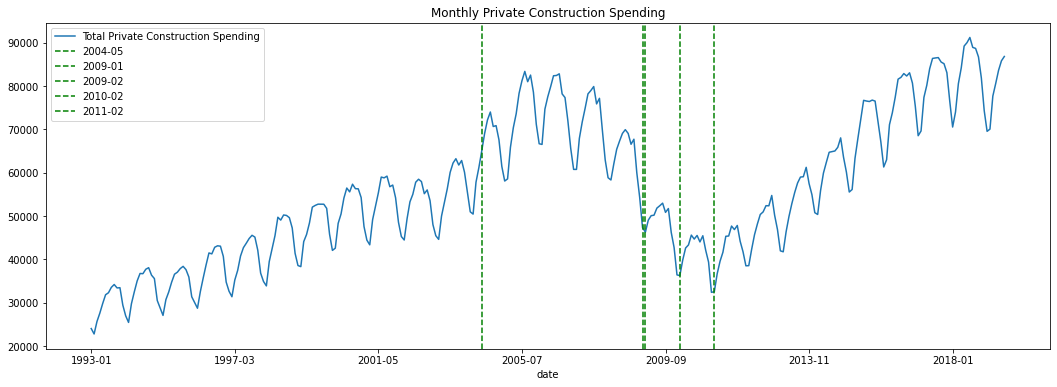

In [4]:
# List the indices of the true changepoints in the "Total Private Construction Spending" from the Turing study

import json 
import pandas as pd 
import numpy as np 
import itertools 
import warnings
warnings.filterwarnings("ignore")

dataset = 'construction'
annotator_df = pd.read_json('TCPD-master/annotations.json') 
dataset_df = annotator_df[[dataset]] 
list2d = np.array(dataset_df).flatten() 
list2d = [l for l in list2d if (type(l)==list)] 
dataset_annotation_lst = list(itertools.chain.from_iterable(list2d))
dataset_annotation_lst

# Plot the timeseries and the true changepoint

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from load_dataset import TimeSeries 

path = str('TCPD-master/datasets/' + dataset + '/' + dataset + '.json')
ts = TimeSeries.from_json(path)
dataset_df = ts.df
dataset_df['date'] =ts.datestr
#print(dataset_df.dtypes)
column_name = 'Total Private Construction Spending'
dataset_df.plot('date', column_name,figsize=(18, 6))
dataset_df['is_CPD'] = np.where(dataset_df.t.isin(dataset_annotation_lst), 1,0)
plt.axvline(dataset_df.loc[dataset_df['is_CPD']==1][['t']].values[0], color='green', linestyle='--', label='2004-05')
plt.axvline(dataset_df.loc[dataset_df['is_CPD']==1][['t']].values[1], color='green', linestyle='--', label='2009-01')
plt.axvline(dataset_df.loc[dataset_df['is_CPD']==1][['t']].values[2], color='green', linestyle='--', label='2009-02')
plt.axvline(dataset_df.loc[dataset_df['is_CPD']==1][['t']].values[3], color='green', linestyle='--', label='2010-02')
plt.axvline(dataset_df.loc[dataset_df['is_CPD']==1][['t']].values[4], color='green', linestyle='--', label='2011-02')
plt.legend()
plt.title("Monthly Private Construction Spending")
true_cp = dataset_df.iloc[32]['date']

#### Detect and plot the changepoints using BOCPD NORMAL_KNOWN_MODEL

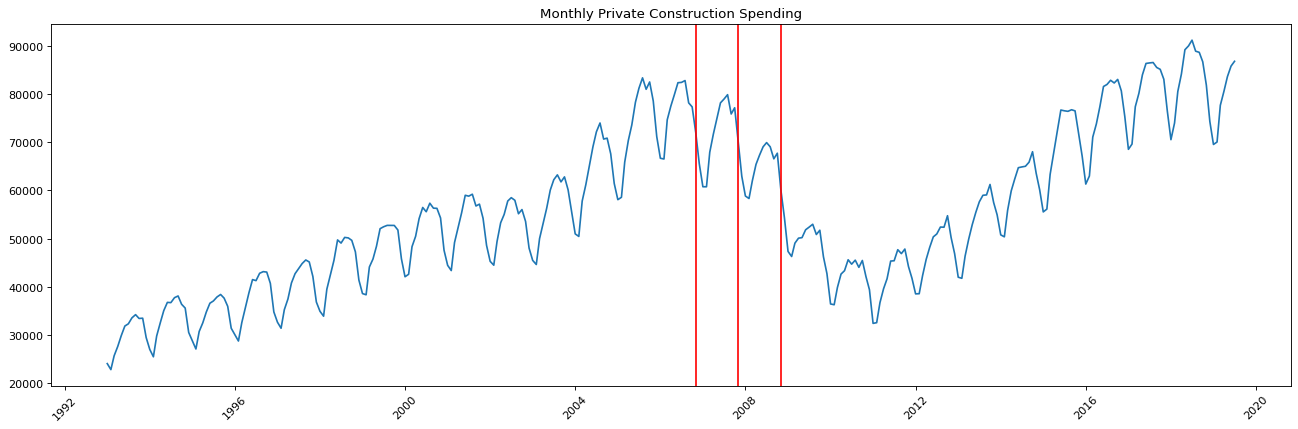

Detected changepoint(s): 


[(TimeSeriesChangePoint(start_time: 2006-11-01T00:00:00.000000000, end_time: 2006-11-01T00:00:00.000000000, confidence: 0.5643137326336457),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7fb36e8d6760>),
 (TimeSeriesChangePoint(start_time: 2007-11-01T00:00:00.000000000, end_time: 2007-11-01T00:00:00.000000000, confidence: 0.6217542998560829),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7fb36ebf6130>),
 (TimeSeriesChangePoint(start_time: 2008-11-01T00:00:00.000000000, end_time: 2008-11-01T00:00:00.000000000, confidence: 0.6349703667802497),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7fb36ebf6e20>)]

In [5]:
## Detect changepoints in the Private Construction Spending timeseries with BOCP Detector algorithm

from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, NormalKnownParameters, TrendChangeParameters, PoissonModelParameters
from kats.consts import TimeSeriesData

df = dataset_df
df['time']= pd.to_datetime(df['date'])
tsd = TimeSeriesData(df.loc[:,['time', column_name]])
detector = BOCPDetector(tsd)

#parameters for normal probability model
model_dist_paramters = NormalKnownParameters()
model_dist_paramters.empirical=True
model_dist_paramters.known_prec_multiplier=[1.0, 2.0, 3.0, 4.0, 5.0]

change_points = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL,
    model_parameters=model_dist_paramters,    
    #changepoint_prior=.1#prior belief    
    #threshold=.5    
)
figure(figsize=(20, 6), dpi=80)
plt.xticks(rotation=45)
plt.title("Monthly Private Construction Spending")
detector.plot(change_points)
print("Detected changepoint(s): ")
change_points

#### Results
See appendix notebook with deep dive on BOCP for full code and hyperparameter tuning plots.

- Testing the other two model types resulted in errors. 

- None of the three hyperparameter have impact on changepoint detected. 

- The confidence interval is highly dependent on data size. The higher the data size, higher the confidence in changepoint detected.  

- Out of the three underlying probability distribution model, Normal model detects either the exact changepoints or near changepoint. The Poisson model does not detect much changepoints and exhaust the sampling threshold without detecting.

### Evaluating RS Detector on GDP of Japan data <a name="part1c"></a>
The Robust Stat Detector detects shifts in mean in a time-series. It takes into account a fixed number of points, `comparison_window`, over which to calculate the mean, `smoothing_window_size`, and detects changepoints within a given confidence level, `p_value_cutoff`. 

The code below utilizes the [GDP of Japan dataset](https://github.com/alan-turing-institute/TCPD/tree/master/datasets/gdp_japan) from the Turing study to explore the Robust Stat Detector algorithm and its parameters. 

#### Import the data and plot true changepoint

True Changepoint at: 1992


<Figure size 1600x480 with 0 Axes>

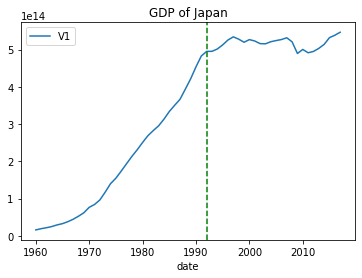

In [6]:
# List the indices of the true changepoints in the GDP of Japan timeseries from the Turing study
import json 
import pandas as pd 
import numpy as np 
import itertools 

dataset = 'gdp_japan'
annotator_df = pd.read_json('TCPD-master/annotations.json') 
dataset_df = annotator_df[[dataset]] 
list2d = np.array(dataset_df).flatten() 
list2d = [l for l in list2d if (type(l)==list)] 
dataset_annotation_lst = list(itertools.chain.from_iterable(list2d))
dataset_annotation_lst

# Plot the timeseries and the true changepoint
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from load_dataset import TimeSeries 

path = str('TCPD-master/datasets/' + dataset + '/' + dataset + '.json')
ts = TimeSeries.from_json(path)
dataset_df = ts.df
dataset_df['date'] =ts.datestr
#print(dataset_df.dtypes)
column_name = 'V1'
figure(figsize=(20, 6), dpi=80)
dataset_df.plot('date', 'V1')
dataset_df['is_CPD'] = np.where(dataset_df.t.isin(dataset_annotation_lst), 1,0)
plt.axvline(dataset_df.loc[dataset_df['is_CPD']==1][['t']].values[0], color='green', linestyle='--')
plt.title("GDP of Japan")
true_cp = dataset_df.iloc[32]['date']
print("True Changepoint at: " + true_cp )



#### Detect and plot changepoint found using RSD

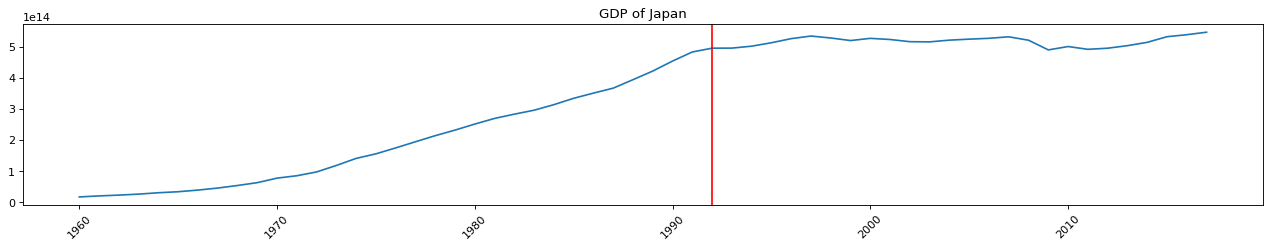

Detected changepoint(s): 


[(TimeSeriesChangePoint(start_time: 1992-01-01T00:00:00.000000000, end_time: 1992-01-01T00:00:00.000000000, confidence: 0.9581645425913177),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7fb36e940dc0>)]

In [7]:
# Detect changepoints in the GDP of Japan timeseries with at least 95% confidence with Robust Stat Detector algorithm

from kats.detectors.robust_stat_detection import RobustStatDetector
from kats.consts import TimeSeriesData

df = dataset_df
df['time']= pd.to_datetime(df['date'])
tsd = TimeSeriesData(df.loc[:,['time', column_name]])
detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=5, smoothing_window_size=5, p_value_cutoff=0.05)
figure(figsize=(20, 3), dpi=80)
plt.xticks(rotation=45)
plt.title("GDP of Japan")
detector.plot(change_points)
print("Detected changepoint(s): ")
change_points

#### Results
Refer to the appendix notebook with deep dive on RSD for analysis on varying dataset sizes and hyperparameter tuning plots. 

- The true changepoint, '1992', is only detected when the `comparison_window` or `smoothing_size_window` ranges from 1-8 or is at the value of 19 in a dataset of 54 rows. Interestingly, the valid range for both parameters is the same and either one should be within the valid range to detect the true changepoint. 

- Upon repeating the same hyperparamter sweep for the Robust Stat Detector algorithm on various timeseries datasets with a different number of datapoints, we observed that both parameters have the same valid range. It can also be observed that number of false positives or incorrectly detected changepoints increase as the comparison_window size increases.

- The valid range of values which detect true changepoints is the same for both comparison_window and smoothing_window_size.

- Either but not necesarily both parameters need to be in the valid range to detect the true changepoint.

- The valid range is usually <25% of the total rows or datapoints in a larger timeseries (more datapoints).

- Having a smaller comparison_window than smoothing_window_size results in fewer false positives detected by the RSD algorithm. 

### Algorithm Selection Criteria <a name="part1d"></a>

Based on our finding from each algorithm run on datasets of varying domains, sizes, and number of changepoints, we recommend the selection criteria below. 

| Timeseries          | CUSUM | BOCP | RS |
|---------------------|-------|------|----|
| Outliers            | o     |      | o  |
| Few Datapoints      | o     |      | o  |
| Known CP Direction  | o     |      |    |
| Multiple CPs        |       | o    | o  |
| Seasonality         |       | o    |    |
| No Domain Knowledge |       | o    |    |

## Part 2: Applied Research on Google Mobility Data <a name="part2"></a>

In this section, we apply the KATS algorithms to the Google Mobility dataset which has multiple timeseries with over 20,000 rows each. We start by exploring the Global Mobility Report for the United States which can be downloaded from [here](https://www.google.com/covid19/mobility/).

The timeseries data shows how visits to places, such as grocery stores and parks, are changing in each geographic region compared to a baseline. The baseline is the median value, for the corresponding day of the week, during the five week period Jan 3–Feb 6, 2020. For each region-category, the baseline isn’t a single value. It is seven individual values. The same number of visitors on two different days of the week result in different percentage changes.
Larger changes do not mean more visitors and smaller changes do not mean less visitors. Day to day comparison of changes will lead to misleading results. 
Mobility trends are measured across six broad categories:
* Residential: places of residence.
* Grocery & Pharmacy stores: places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.
* Workplaces: places of work.
* Parks: places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.
* Transit stations: places like public transport hubs such as subway, bus, and train stations.
* Retail & Recreation: places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

The 'Residential' category shows a change in duration, while the other categories measure a change in total visitors.
The dataset has 812065 observations and 15 features. The data is completely anonymized from users who have turned on the Location History setting, which is off by default. If there’s not enough data for an estimate of change from the baseline, that means Google wasn’t able to confidently and anonymously compute the estimate.

### Methodology

In this section, we apply each changepoint detection algorithm to the Google Mobility dataset exploring how the three algorthms perform based on different characteristics in a timeseries.  

The purpose of applying the KATS changepoint algorithms to the Google Mobility dataset is to explore how the algorithms behave in a real data scenario where catalyst dates are known, but the changepoints are unknown. The time when a change is announced may differ than the time when the change is observed in effect. We attempt to observe this effect via the different trends in the Google Mobility dataset in this section. 

In this section, we use the aggreaged United States data as well as data from a few individual states across the country. We use Washington state since we have more contextual knowledge about it. We use New York and Florida data as both have vastly different context in terms of polity and climate, both of which have an effect on mobility.

#### Plot each timeseries
Here we are using the United States data as an example to illustrate the shape of each timeseries in different mobility categories. 

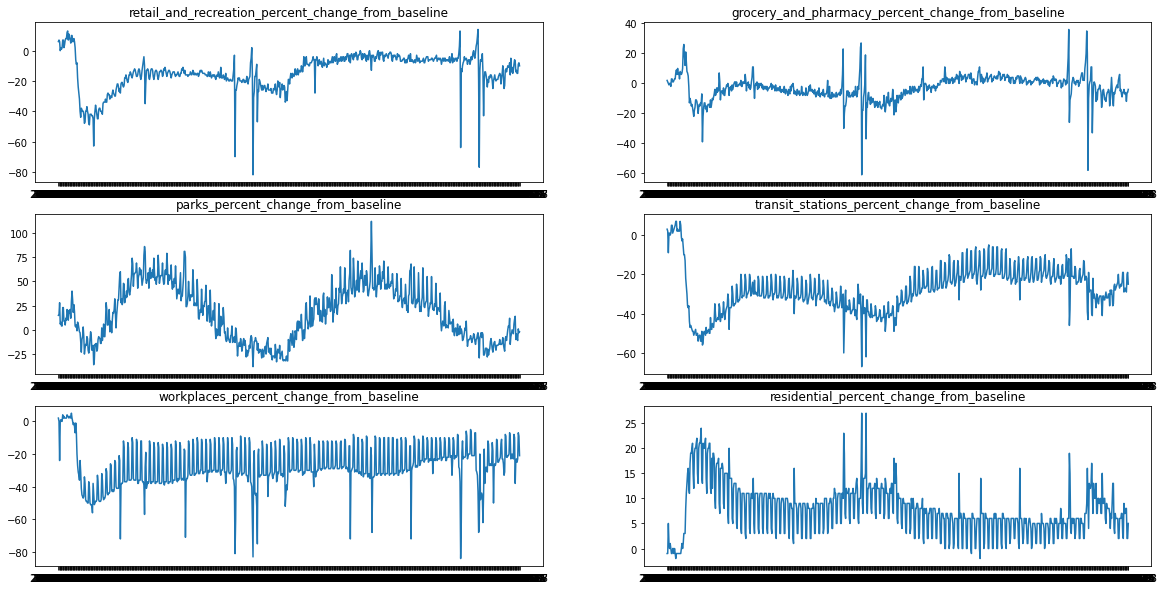

In [8]:
# Import packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt

# Create a dataframe for US Mobility
df=pd.read_csv('Global_Mobility_Report.csv')
df=df.loc[df.country_region_code=='US']
df=df[df.sub_region_1.isnull()]
df=df[df.sub_region_2.isnull()]

# Plot all 6 timeseries
figure, axis = plt.subplots(3, 2,figsize=(20,10))
fig1 = axis[0, 0].plot(df['date'], df['retail_and_recreation_percent_change_from_baseline'])
fig1 = axis[0, 0].set_title("retail_and_recreation_percent_change_from_baseline")
fig2 = axis[0, 1].plot(df['date'], df['grocery_and_pharmacy_percent_change_from_baseline'])
fig2 = axis[0, 1].set_title("grocery_and_pharmacy_percent_change_from_baseline")
fig3 = axis[1, 0].plot(df['date'], df['parks_percent_change_from_baseline'])
fig3 = axis[1, 0].set_title("parks_percent_change_from_baseline")
fig4 = axis[1, 1].plot(df['date'], df['transit_stations_percent_change_from_baseline'])
fig4 = axis[1, 1].set_title("transit_stations_percent_change_from_baseline")
fig5 = axis[2, 0].plot(df['date'], df['workplaces_percent_change_from_baseline'])
fig5 = axis[2, 0].set_title("workplaces_percent_change_from_baseline")
fig6 = axis[2, 1].plot(df['date'], df['residential_percent_change_from_baseline'])
fig6 = axis[2, 1].set_title("residential_percent_change_from_baseline")

title_list = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline' , 'residential_percent_change_from_baseline']

From the six timeseries, the transit data shows characteristics of having both **drastic and subtle changepoints** in different interest windows. This is a good candidate for evaluating sensitivity of detecting **multiple changepoints**. 

The parks data reflects characteristics of **seasonality** due to its sinusoidal shape. Intuitively, this makes sense with outdoor temperature affecting mobility in parks regardless of the COVID-19 pandemic regulations. This makes the park data a good candidate to test algorithm performance for the effect of seasonality on changepoint detection. 

The retail and grocery timeseries show similar cyclicity with some significant **outliers**. These make good candiates to test algorithm performance for outlier resistance when detecting changepoints. 

### Multiple changepoints <a name="part2a"></a>
To test how the changepoint algorithms perform on their ability to detect both drastic and subtle changepoints, we use the Washington state transit mobility data. While there is a drastic drop in transity traffic during the start of the pandemic, there are smaller changepoints throughout the course of the pandemic due to changing state government guidance. 

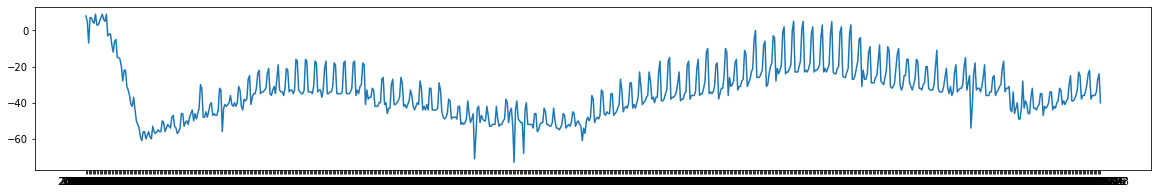

In [9]:
# Create a dataframe for WA transit mobility
df=pd.read_csv('Global_Mobility_Report.csv')
df=df.loc[df.country_region_code=='US']

WAdf=df.loc[df.sub_region_1=='Washington']
WAdf=WAdf[WAdf.sub_region_2.isnull()]

plt.rcParams["figure.figsize"] = (20,3)
plt.plot(WAdf['date'],WAdf['transit_stations_percent_change_from_baseline'])

#### Run CUSUM Detector on WA transit data

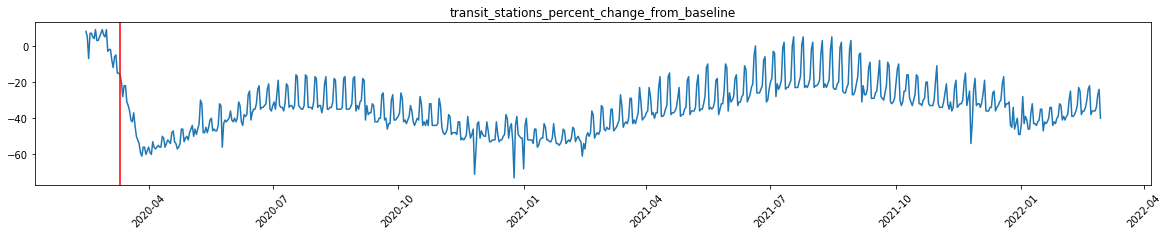

0: (TimeSeriesChangePoint(start_time: 2020-03-11 00:00:00, end_time: 2020-03-11 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb36f268700>)


In [10]:
# Import packages for cusum
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData,TimeSeriesChangePoint

# Create TimeSeries Object
WAdf['time']=pd.to_datetime(WAdf['date'])
tsd = TimeSeriesData(WAdf.loc[:,['time', 'transit_stations_percent_change_from_baseline']])
detector = CUSUMDetector(tsd)
change_points = detector.detector()
plt.title('transit_stations_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Run BOCP Detector on WA transit data

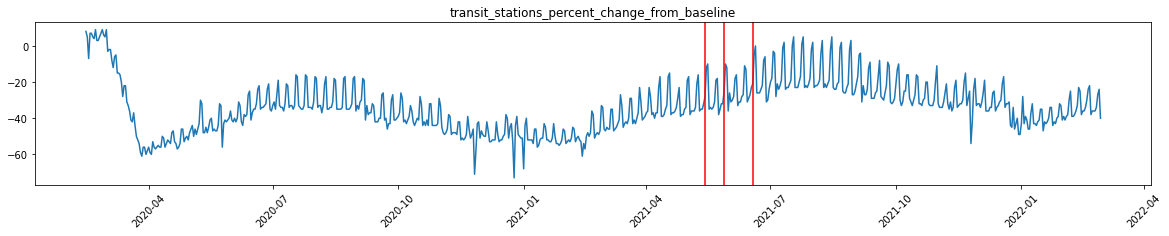

0: (TimeSeriesChangePoint(start_time: 2021-05-14T00:00:00.000000000, end_time: 2021-05-14T00:00:00.000000000, confidence: 0.6454984780304986), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb29243feb0>)
1: (TimeSeriesChangePoint(start_time: 2021-05-28T00:00:00.000000000, end_time: 2021-05-28T00:00:00.000000000, confidence: 0.5689564261608572), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb28bbf5a60>)
2: (TimeSeriesChangePoint(start_time: 2021-06-18T00:00:00.000000000, end_time: 2021-06-18T00:00:00.000000000, confidence: 0.6169727366429205), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb36ea0c910>)


In [11]:
# Import packages for bocp
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, NormalKnownParameters, TrendChangeParameters, PoissonModelParameters
from kats.consts import TimeSeriesData

# Create TimeSeries Object
WAdf['time']=pd.to_datetime(WAdf['date'])
tsd = TimeSeriesData(WAdf.loc[:,['time', 'transit_stations_percent_change_from_baseline']])
detector = BOCPDetector(tsd)

# parameters for normal probability model
model_dist_paramters = NormalKnownParameters()
model_dist_paramters.empirical=True
model_dist_paramters.known_prec_multiplier=[1.0, 2.0, 3.0, 4.0, 5.0]

change_points = detector.detector(model=BOCPDModelType.NORMAL_KNOWN_MODEL, model_parameters=model_dist_paramters,)
plt.title('transit_stations_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Run RS Detector on WA transit data

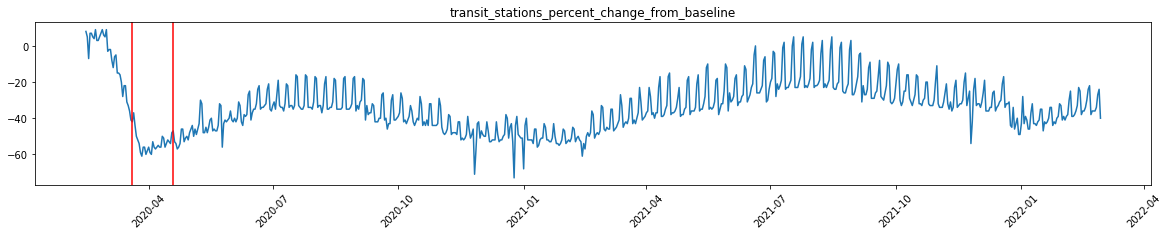

0: (TimeSeriesChangePoint(start_time: 2020-03-20T00:00:00.000000000, end_time: 2020-03-20T00:00:00.000000000, confidence: 0.9513530035276168), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb28681ff40>)
1: (TimeSeriesChangePoint(start_time: 2020-04-19T00:00:00.000000000, end_time: 2020-04-19T00:00:00.000000000, confidence: 0.9708444074378831), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb28682f8b0>)


In [12]:
# Import packages for rs
from kats.consts import TimeSeriesData
from kats.detectors.robust_stat_detection import RobustStatDetector

# Create TimeSeries Object
WAdf['time']=pd.to_datetime(WAdf['date'])
tsd = TimeSeriesData(WAdf.loc[:,['time', 'transit_stations_percent_change_from_baseline']])
detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=10, smoothing_window_size=30, p_value_cutoff=0.05)
plt.title('transit_stations_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Result
The CUSUM detector only detects one changepoint in each direction and thus is not suitable for a large timeseries with both drastic and subtle changepoints unless the timeseries is segmented into interest windows where an expected changepoint is to occur. 

Without this prior knowledge, one would have to scan the entire timeseries with multiple window and plot all the discovered changepoints requiring extra coding effort. 

Both the BOCP and RS detectors are better choices for timeseries data with multiple expected changepoints. 

### Seasonality <a name="part2b"></a>

To test how the changepoint algorithms perform on timeseries with seasonality, we use the New York state park mobility data since the weather patterns follow distinct seasons. We can compare this to the Florida state park mobility data which has a constant shape through the months as seen in the chart below. 

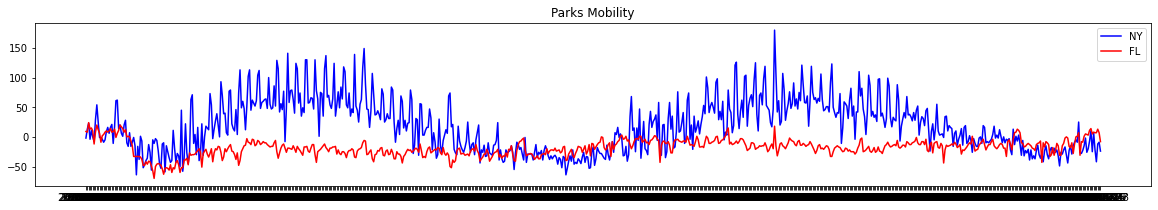

In [13]:
# Create a dataframe for NY and FL parks Mobility
df=pd.read_csv('Global_Mobility_Report.csv')
df=df.loc[df.country_region_code=='US']

NYdf=df.loc[df.sub_region_1=='New York']
NYdf=NYdf[NYdf.sub_region_2.isnull()]

FLdf=df.loc[df.sub_region_1=='Florida']
FLdf=FLdf[FLdf.sub_region_2.isnull()]

# Plot NY and FL time series
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(NYdf['date'],NYdf['parks_percent_change_from_baseline'], label='NY', color='blue')
plt.plot(FLdf['date'], FLdf['parks_percent_change_from_baseline'], label='FL', color='red')
plt.title('Parks Mobility')
plt.legend()
plt.show()

#### Run CUSUM Detector on NY parks data

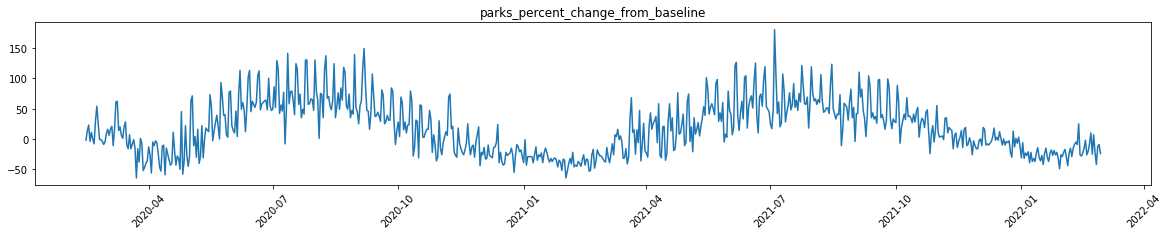

In [14]:
# Import packages for cusum
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData,TimeSeriesChangePoint

# Create TimeSeries Object
NYdf['time']=pd.to_datetime(NYdf['date'])
tsd = TimeSeriesData(NYdf.loc[:,['time', 'parks_percent_change_from_baseline']])
detector = CUSUMDetector(tsd)
change_points = detector.detector()
plt.title('parks_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Run BOCP Detector on NY parks data

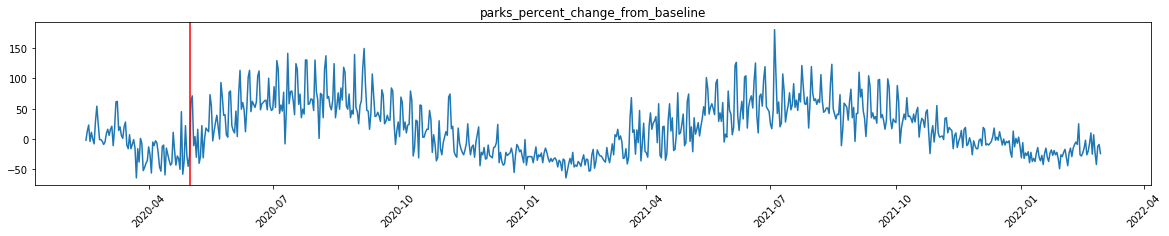

0: (TimeSeriesChangePoint(start_time: 2020-05-01T00:00:00.000000000, end_time: 2020-05-01T00:00:00.000000000, confidence: 0.6519575162054518), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb28bc12280>)


In [15]:
# Import packages for bocp
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, NormalKnownParameters, TrendChangeParameters, PoissonModelParameters
from kats.consts import TimeSeriesData

# Create TimeSeries Object
NYdf['time']=pd.to_datetime(NYdf['date'])
tsd = TimeSeriesData(NYdf.loc[:,['time', 'parks_percent_change_from_baseline']])
detector = BOCPDetector(tsd)

# parameters for normal probability model
model_dist_paramters = NormalKnownParameters()
model_dist_paramters.empirical=True
model_dist_paramters.known_prec_multiplier=[1.0, 2.0, 3.0, 4.0, 5.0]

change_points = detector.detector(model=BOCPDModelType.NORMAL_KNOWN_MODEL, model_parameters=model_dist_paramters,)
plt.title('parks_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Run RS Detector on NY parks data

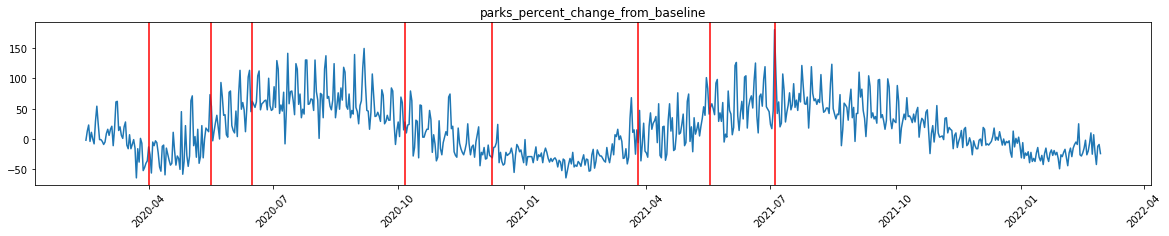

0: (TimeSeriesChangePoint(start_time: 2020-04-01T00:00:00.000000000, end_time: 2020-04-01T00:00:00.000000000, confidence: 0.9571193793945709), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb223c422e0>)
1: (TimeSeriesChangePoint(start_time: 2020-05-17T00:00:00.000000000, end_time: 2020-05-17T00:00:00.000000000, confidence: 0.9629405663804229), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb223c42c40>)
2: (TimeSeriesChangePoint(start_time: 2020-06-16T00:00:00.000000000, end_time: 2020-06-16T00:00:00.000000000, confidence: 0.9917820999968969), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb28bc120a0>)
3: (TimeSeriesChangePoint(start_time: 2020-10-06T00:00:00.000000000, end_time: 2020-10-06T00:00:00.000000000, confidence: 0.9551834596804034), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb28bc12220>)
4: (TimeSeriesChangePoint(start_time: 2020-12-09T00:00:00.000000000, end_time: 2020-12-09T00

In [16]:
# Import packages for rs
from kats.consts import TimeSeriesData
from kats.detectors.robust_stat_detection import RobustStatDetector

# Create TimeSeries Object
NYdf['time']=pd.to_datetime(NYdf['date'])
tsd = TimeSeriesData(NYdf.loc[:,['time', 'parks_percent_change_from_baseline']])
detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=10, smoothing_window_size=30, p_value_cutoff=0.05)
plt.title('parks_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Result
The BOCP Detector performs the best on a timeseries with seasonality. As seen in the charts above, RS Detector finds a changepoint in each season in an observable pattern. These are false postive changepoints since with every season change, there would be expected shifts in park traffic. However, a good changepoint detector should be resilient to expected seasonal changes. The BOCP Detector detects a single changepoint on May 1, 2020 which aligns with the major dip in mobility caused by COVID-19 seen in all the mobility timeseries. The CUSUM detector does not detect any changepoints in this case. 

### Outliers <a name="part2c"></a>
To test how the changepoint algorithms perform on timeseries with outliers, we use the Florida grocery and pharmacy data because it has visible outliers. Ideally, a good changepoint detector should not label outliers as changepoints. 

#### Run CUSUM on FL grocery and pharmacy data

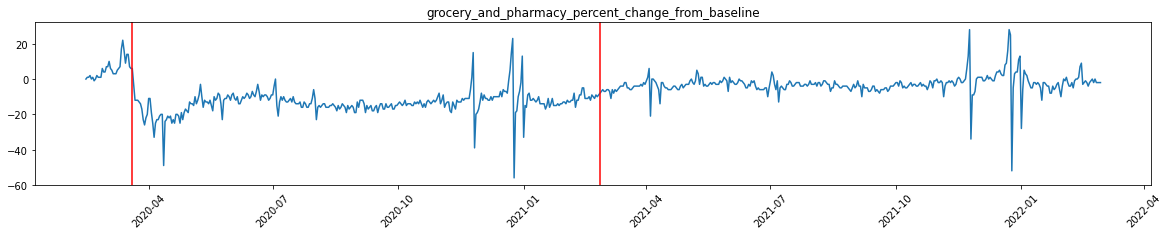

0: (TimeSeriesChangePoint(start_time: 2021-02-26 00:00:00, end_time: 2021-02-26 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb223c42c70>)
1: (TimeSeriesChangePoint(start_time: 2020-03-20 00:00:00, end_time: 2020-03-20 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x7fb223c42f70>)


In [17]:
# Import packages for cusum
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData,TimeSeriesChangePoint

# Create TimeSeries Object
FLdf['time']=pd.to_datetime(FLdf['date'])
tsd = TimeSeriesData(FLdf.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
detector = CUSUMDetector(tsd)
change_points = detector.detector()
plt.title('grocery_and_pharmacy_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

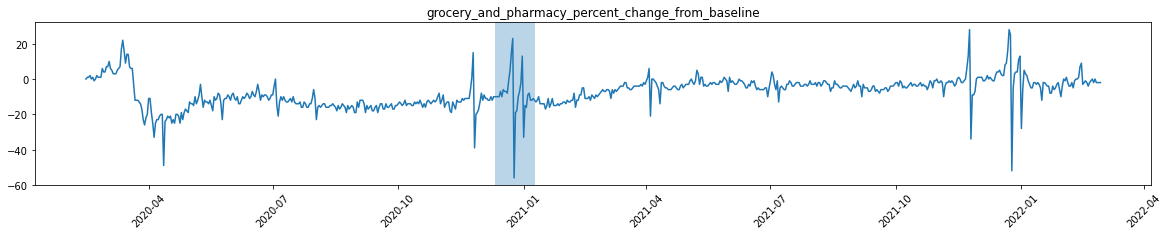

In [18]:
# Import packages for cusum
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData,TimeSeriesChangePoint

# Create TimeSeries Object
FLdf['time']=pd.to_datetime(FLdf['date'])
tsd = TimeSeriesData(FLdf.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
detector = CUSUMDetector(tsd)
change_points = detector.detector(interest_window=[300,330], threshold=0.05)
plt.title('grocery_and_pharmacy_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Run BOCP Detector on FL grocery and pharmacy data

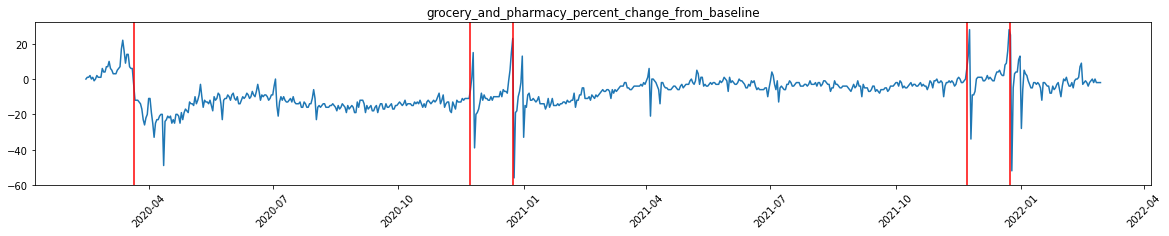

0: (TimeSeriesChangePoint(start_time: 2020-03-21T00:00:00.000000000, end_time: 2020-03-21T00:00:00.000000000, confidence: 0.6521216322351789), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb1d0d06250>)
1: (TimeSeriesChangePoint(start_time: 2020-11-23T00:00:00.000000000, end_time: 2020-11-23T00:00:00.000000000, confidence: 0.5016486892877552), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb1d0d067f0>)
2: (TimeSeriesChangePoint(start_time: 2020-12-24T00:00:00.000000000, end_time: 2020-12-24T00:00:00.000000000, confidence: 0.9501632956527803), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb1d0cf0400>)
3: (TimeSeriesChangePoint(start_time: 2021-11-22T00:00:00.000000000, end_time: 2021-11-22T00:00:00.000000000, confidence: 0.5615984219859559), <kats.detectors.bocpd.BOCPDMetadata object at 0x7fb1d0d1c610>)
4: (TimeSeriesChangePoint(start_time: 2021-12-24T00:00:00.000000000, end_time: 2021-12-24T00:00:00.000000000, confidence: 0.9799864061751026), <kats.detectors.bocpd.BOCPDMetada

In [19]:
# Import packages for bocp
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, NormalKnownParameters, TrendChangeParameters, PoissonModelParameters
from kats.consts import TimeSeriesData

# Create TimeSeries Object
FLdf['time']=pd.to_datetime(FLdf['date'])
tsd = TimeSeriesData(FLdf.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
detector = BOCPDetector(tsd)

# parameters for normal probability model
model_dist_paramters = NormalKnownParameters()
model_dist_paramters.empirical=True
model_dist_paramters.known_prec_multiplier=[1.0, 2.0, 3.0, 4.0, 5.0]

change_points = detector.detector(model=BOCPDModelType.NORMAL_KNOWN_MODEL, model_parameters=model_dist_paramters,)
plt.title('grocery_and_pharmacy_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Run RS Detector on FL grocery and pharmacy data

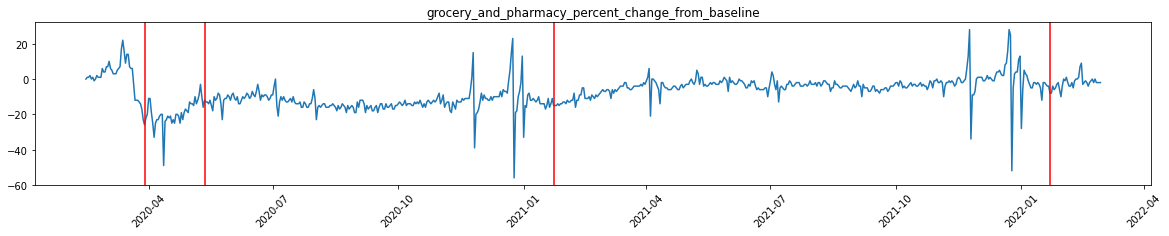

0: (TimeSeriesChangePoint(start_time: 2020-03-29T00:00:00.000000000, end_time: 2020-03-29T00:00:00.000000000, confidence: 0.9800751882232083), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb1d0e9edc0>)
1: (TimeSeriesChangePoint(start_time: 2020-05-12T00:00:00.000000000, end_time: 2020-05-12T00:00:00.000000000, confidence: 0.9848441834652332), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb1d0d1c220>)
2: (TimeSeriesChangePoint(start_time: 2021-01-23T00:00:00.000000000, end_time: 2021-01-23T00:00:00.000000000, confidence: 0.9778221155452734), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb1d0d1cfd0>)
3: (TimeSeriesChangePoint(start_time: 2022-01-22T00:00:00.000000000, end_time: 2022-01-22T00:00:00.000000000, confidence: 0.9665502334729693), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x7fb1d0d1cf70>)


In [20]:
# Import packages for rs
from kats.consts import TimeSeriesData
from kats.detectors.robust_stat_detection import RobustStatDetector

# Create TimeSeries Object
FLdf['time']=pd.to_datetime(FLdf['date'])
tsd = TimeSeriesData(FLdf.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=10, smoothing_window_size=30, p_value_cutoff=0.05)
plt.title('grocery_and_pharmacy_percent_change_from_baseline')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
fig = detector.plot(change_points)
  
# List the changepoints
for i in range(0,len(change_points)):
    print(str(i) + ":", change_points[i])

#### Result
The BOCP detector fails the assessment of being outlier resilient since it detects several outliers as changepoints which are false positives. The CUSUM detector with and without an interest window does not mislabel outliers as changepoints. RS detector also does not detect outliers as changepoints. Both prove to be better algorithms for timeseries that have outliers. 

### Algorithm Selection for the COVID-19 Story <a name="part2d"></a>

- The key changepoints in the COVID-19 story for the United States can be best detected using the Robust Stat detector because the data is highly aggregated. Therefore, it does not contain as drastic seasonality. However, there are a few outliers that oppose the regular trend which should not be mislabeled as changepoints. Since there are over 700 days worth of data, it can be expected that there will be multiple changepoints.

- For individual states, algorithm selection must be based on some domain knowledge of the timeseries. For example, states with constant climate can use the Robust Stat detector, but others with changing seasons would need to opt for BOCP detector or CUSUM with multiple interest windows.

- In the case that there is no domain knowledge of the state, BOCP detector in its current form is a strong choice because there would be no need for parameter selection to detect multiple changepoints.

- To find how specific rules or regulations and their near-term impact, CUSUM detector would be an ideal choice because an interest window as well as the direction of the changepoint can be specified before application. County level data in shorter time frames can be analyzed using the CUSUM detector. 

## Part 3: The COVID-19 Story Told Through Changepoints <a name="part3"></a>

As discovered through this project, changepoint detection is a great way to tell a story about historical events. While true changepoints provide context on when an event occured, such as policy change, detected changepoints mark when the change actually takes effect on the ground. This makes changepoint detection an apt way to describe the events during the COVID-19 pandemic. The goal of this section is to portray how COVID-19 affected trends in mobility as seen through true changepoints and detected changepoints. We analyze the timing of preventative actions during the pandemic and their after-effects on mobility in various contexts across the United States.

### COVID-19 in the United States <a name="part3a"></a>

When the pandemic was officially announced in March 2020, there were a series of events over the course of the next two years, that occured to control the spread the of the COVID-19 virus in the United States. These preventative measures included stay-at-home orders, mask mandates, and vaccines. The list of events are outlined in the table below. Of all the events, the key actions that affect mobility are bolded. We denote these as true changepoints.

| Dates          | Events                                                                                                                                           |   |   |   |
|----------------|--------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
|      1/31/2020 | On January 29, the U.S. formally announced a White House Coronavirus Task Force,                                                                 |   |   |   |
|      2/15/2020 | New cases are being reported throughout the country nearly every day                                                                             |   |   |   |
|       3/8/2020 | 19 deaths in Washington out of 22 total                                                                                                          |   |   |   |
|      3/12/2020 | Total U.S. cases passed 1,500                                                                                                                    |   |   |   |
|      **3/15/2020** | **CDC issued guidance recommending against any gathering of 50 or more people for an eight-week period.**                                        |   |   |   |
|      **3/16/2020** | **President Trump issued new guidelines urging people to avoid social gatherings of more than ten people and to restrict discretionary travel.** |   |   |   |
|      3/31/2020 | As of March 31, Our World in Data reported there were 3,170 deaths, 164,620 confirmed cases, and 1.07 million tests completed in the U.S         |   |   |   |
|   **4/3/2020** | **On April 3, 2020, the CDC issued guidance recommending that non-medical face coverings be worn in public**                                     |   |   |   |
|      5/27/2020 | The number of COVID-19 deaths in the U.S. tops 100,000.[                                                                                         |   |   |   |
|      11/5/2020 | U.S. reported a single-day count of more than 100,000 new cases for the first time                                                               |   |   |   |
|     12/14/2020 | On December 14, the U.S. surpassed 300,000 deaths, with an average more than 961 deaths per day                                                  |   |   |   |
| **12/31/2020** | **Delta Variant found in Florida**                                                                                                               |   |   |   |
| **12/31/2020** | **Vaccines available**                                                                                                                           |   |   |   |
|   **2/1/2021** | **Distribution of vaccines**                                                                                                                     |   |   |   |
|      3/12/2021 | the United States surpassed 100 million doses administered                                                                                       |   |   |   |
|      8/23/2021 | Pfizer full approval                                                                                                                             |   |   |   |
|  **12/1/2021** | **Omicron variant**                                                                                                                              |   |   |   |

To demonstrate the changing retail and recreation mobility trends in the United States due to COVID-19, we chose to apply the Robust Stat Detector to find changepoints. Based on our findings from Part 1 and 2, the Robust Stat Detector is resistant to outliers and has the ability to detect multiple changepoints. It also performs well on datasets without seasonality such as this one. The graph below shows the timeseries of retail and recreation in the US from February 2020 through February 2022. On the overlay, we show the true changepoints from the table above in green and the detected changepoints in red. We used a smoothing_window_size of 15, which is approximately two weeks which was the pace at which the pandemic was being assessed by policy makers. We kept a 10-day comparison window according to the guidance from our analysis in Part 1. We set the p_value_cutoff to 0.05 to ensure at least 95% confidence on each detected changepoint.

Dataset: US Retail and Recreation <br>
Algorithm: Robust Stat Detector <br>
Parameters: comparison_window=10 , smoothing_window_size=15 , p_value_cutoff=0.05 <br>

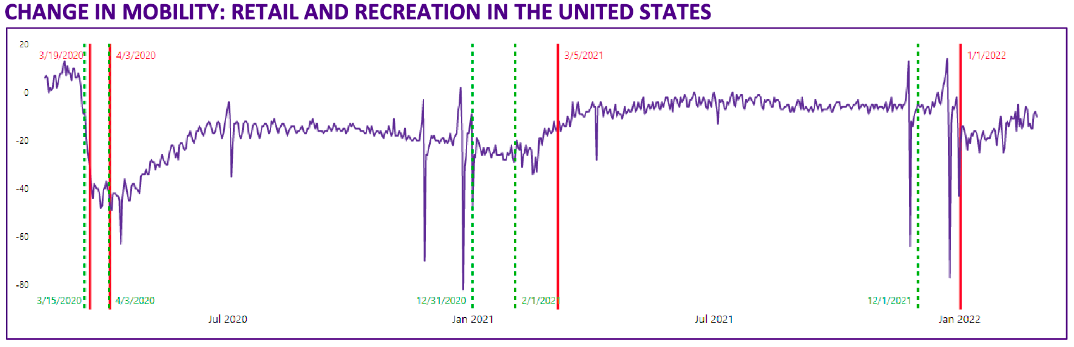

As seen in the plot above, four out of five of the true changepoints, or catalyst events, during the pandemic were detected by the RS detector.

1. The first guidance by the CDC and President of the United States occured on March 15,2020 and 16 respectively announcing a limit to social gatherings. This should have had a direct impact on mobility especially in retail and recreation. This is correctly detected by RSD with a changepoint on 3/19/2020, or 4 days later.
2. The second true changepoint refers to the guidance to wear facial coverings by the CDC on April 3, 2020. This was later established as a mask mandate, which was implemented differently across various states in the US. The detected changepoint occurs on the same day.
3. The third major announcement during the pandemic occurs on December 31, 2020 where vaccines are finally available and the delta variant began to spread. This changepoint is undetected by the RSD. This can be explained due to the small porportion of people who were actually eligible to recive the vaccine when it first came out. The vaccine was only available for health care workers and later essential workers as priority until wide distribution to the general population started. This explains why there was no persistant increase in mobility. There was also no persistant decrease in mobility since restrictions were already in place and the effect of vaccines or a new variant would be mitigated by those regulations.
4. The fourth changepoint is on February 1, 2021 when vaccines were starting to rollout to a wider eligible population. As the eligibility window increased which impacts mobility, RSD detects a changepoint on 3/5/2021.
5. The last major and most recent occurance during the pandemic was the detection of the omicron variant. This occurred when the pandemic was already in progress for about two years and many restriction had eased. However, hospital capacities had started maximizing again and re-opening plans were once again pushed indefinitely. RSD was able to detect this changepoint with an after-effect of about one month where retail mobility took a hit once again and continued to remain lower than pre-omicron.

To add another dimension to understanding how COVID-19 pandemic ravaged the United States with illness, we overlayed another timeseries of confirmed COVID-19 cases on the graph above.

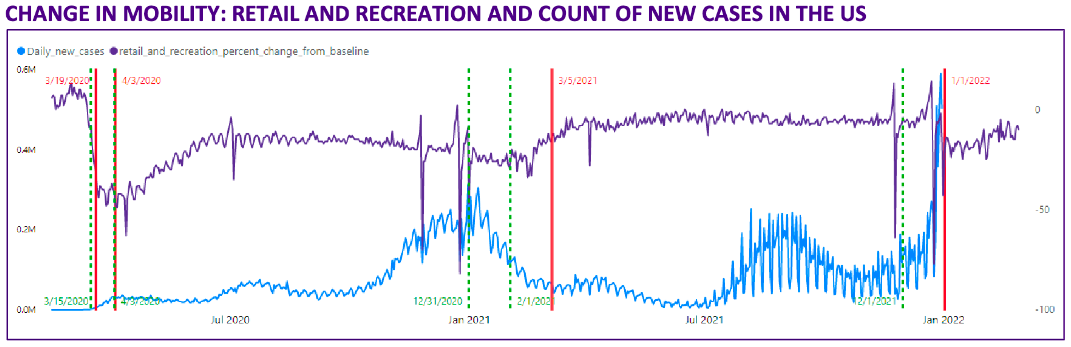

### COVID-19 in King County, Washington <a name="part3b"></a>

As a point of interest, we wanted to explore how changepoints can describe the events of the pandemic in King County Washington State, where our team and university is located. As an example, we chose to model the closure of Seattle public schools and the Stay-at-Home order and their effect on transit traffic in the county.

| Dates         | Events                                             |
|---------------|----------------------------------------------------|
|     1/21/2020 | CDC confirms 1st US Case                           |
|      3/1/2020 | First Covid death in US                            |
| **3/11/2020** | **Seattle Public Schools announce 2 weeks closure** |
| **3/24/2020** | **Inslee signs 2 week stay-at-home proclamation**  |

This use-case is demonstrated aptly by applying the CUSUM detector to locate an expected changepoint in a two-step process.

Dataset: King County Transit Traffic <br>
Algorithm: Cumulative Sum Detector <br>
Parameters: interest_window=[30,50] <br>

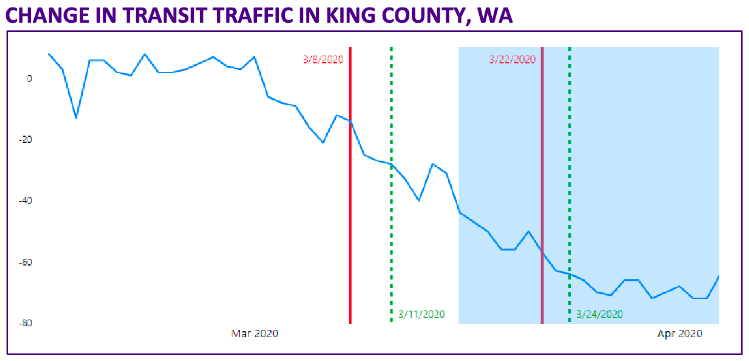

First, we applied the CUSUM detector to the entire timeseries of King County to find the single, biggest changepoint. This resulted in CUSUMD detecting the decrease in transit traffic at the onset of the pandemic signalled by the Seattle public school closure (shown in red in the plot).

Then, we zeroed in on an interest window of 20 days to find the exact changepoint of interest, which is the Stay-At-Home order. The interest window is shaded in blue in the plot. With the interest window fed into the algorithm, the second expected, but more subtle changepoint was detected, shown in red.

The corresponding true changepoints are in green.

### Comparison of COVID-19 in New York vs. Florida <a name="part3c"></a>

One important aspect of the pandemic in the United States is how vastly different the response of states were to CDC and federal recommendations. This is something that can be reflected in the mobility trends of two states that had opposing views on compliance to restrictions. To illustrate this story, we plotted the time series of New York, a state that quickly imposed emergency restrictions, and Florida, a state that remained largely open despite recommendations to contain the spread of COVID-19.

Since parks data is highly seasonal due to the effect of varying weather over months, the apt choice of algorithm to model this comparison is Bayesian Online Changepoint detector. This algorithm is seasonality-resistant.

Dataset: New York and Florida Parks and Recreation <br>
Algorithm: Bayesian Online Changepoint Detector <br>
Parameters: threshold=0.65 <br>

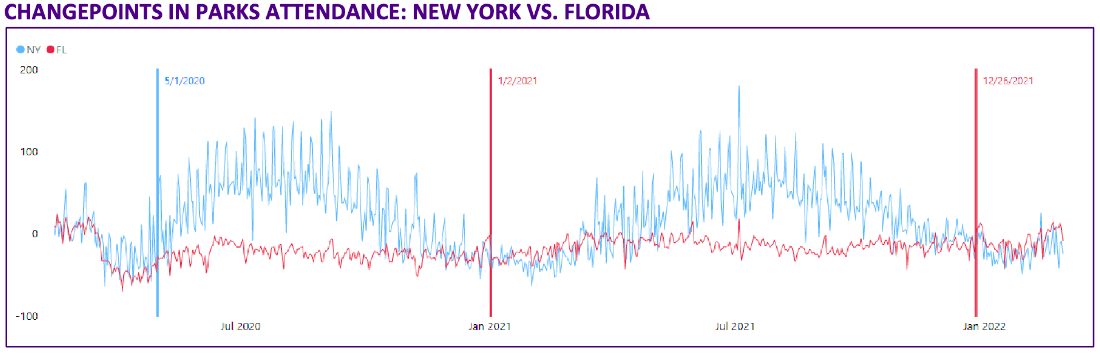

As seen in the plot above, a changepoint was observed in New York parks and recreation traffic recovering after a major dip due to state of emergency orders in which schools, subways, and recreational activities were shut down. This changepoint is shown in blue.

In comparison, no changepoint is observed in Florida until January 2021 and then another year later in January 2022 (highlighted in red). This highlights how resistant the Florida mobility trend had been to the initial precautionary measures brought about at the start of the pandemic in 2020.

## Conclusion

We conducted experiments for various unsupervised changepoint detection algorithms implemented as part of KATS package. As part of the study, we provided a recommendation list based on qualitative and quantitative findings on turing and google mobility datasets to decide which algorithms can be used for a given time-series dataset. The turing datasets are explicitly designed for the evaluation of change point detection algorithms and acted as ground truth for evaluating the algorithm suitability. The annotations/true labels in turing dataset are collected through crowdsourcing and provide a way for us to evaluate these unsupervised changepoint detection algorithms. We also applied the findings to COVID-19 dataset and retrospectively evaluated the detected change points against the major known events in U.S. We also build a data story to show how series of events during COVID-19 impacted daily life.